In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('workforce_schedule.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
# Absenteeism %
absent_rate = 1 - df['Present'].mean()
print(f"Overall Absenteeism Rate: {absent_rate:.2%}")

Overall Absenteeism Rate: 8.00%


In [4]:
# Shift-wise attendance rate
attendance_by_shift = df.groupby('Shift')['Present'].mean()
print("Attendance Rate by Shift:\n", attendance_by_shift)

Attendance Rate by Shift:
 Shift
Evening    0.937500
Morning    0.906977
Night      0.920000
Name: Present, dtype: float64


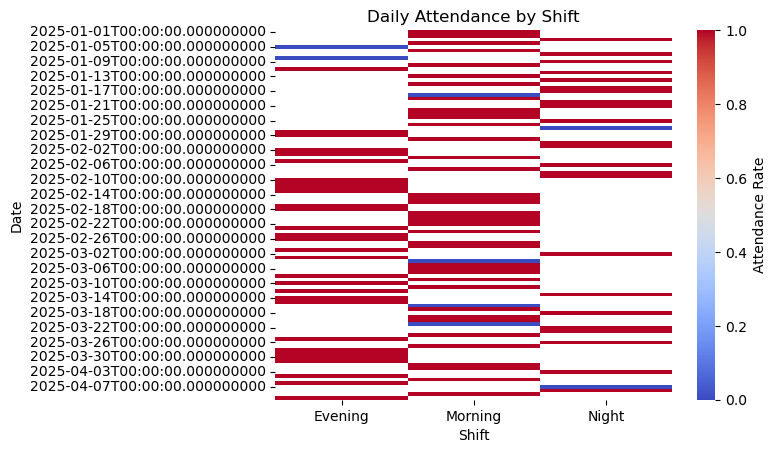

In [5]:
# Shift vs Attendance Heatmap
pivot = df.pivot_table(index='Date', columns='Shift', values='Present', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', cbar_kws={'label': 'Attendance Rate'})
plt.title("Daily Attendance by Shift")
plt.show()

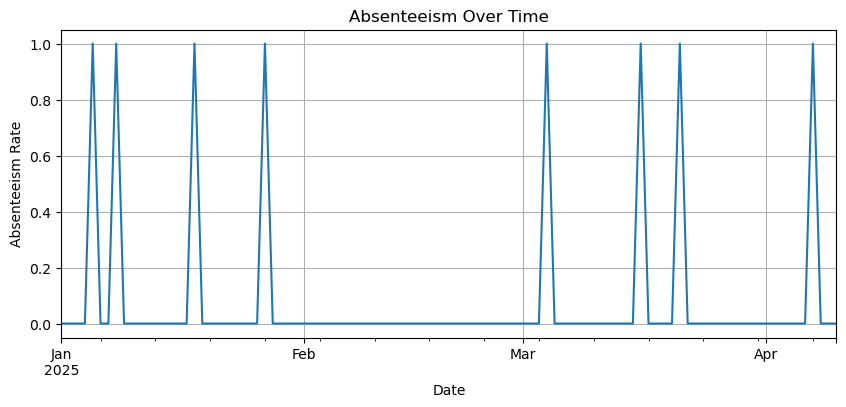

In [6]:
# Absenteeism trend
absent_trend = df.groupby('Date')['Present'].mean().apply(lambda x: 1 - x)
absent_trend.plot(title="Absenteeism Over Time", figsize=(10,4))
plt.ylabel("Absenteeism Rate")
plt.grid()
plt.show()